# Web Scraping

In [53]:
import requests
from bs4 import BeautifulSoup
import smtplib
import time
import datetime
import csv
import pandas as pd

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
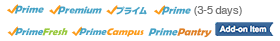

In [22]:
url = 'https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?customId=B0752XJYNL&dchild=1&keywords=data%2Banalyst%2Btshirt&qid=1626655184&sr=8-3&th=1&customizationToken=MC_Assembly_1%23B0752XJYNL'

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(url, headers=headers)

soup1 = BeautifulSoup(page.content, "html.parser")
print(soup1)

In [46]:
soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

title = soup2.find(id='productTitle').get_text().strip()
print(title)

Funny Got Data MIS Data Systems Business Analyst T-Shirt


In [45]:
price_whole = soup2.find('span', class_ = 'a-price-whole').get_text().strip().replace('\n', '').replace(' ', '')

price_fraction = soup2.find('span', class_ = 'a-price-fraction').get_text().strip().replace('\n', '').replace(' ', '')

price = price_whole+price_fraction
print(price)


18.99


In [56]:
 # Add a datestamp
today = datetime.date.today()
#print(today)

In [57]:
# Write this data into a csv file
header = ['Title','Price','Date']
data = [title,price,today]

with open('AmazonScrapedDataset.csv', 'w', newline = '', encoding = 'UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [58]:
 # read it into a dataframe
df = pd.read_csv(r"C:\Users\bindu\AmazonScrapedDataset.csv")
df


Title  Price        Date
0  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22

In [62]:
# now we're appending data
# We don't need the header here coz we're appending data to the already existing data

with open('AmazonScrapedDataset.csv', 'a+', newline = '', encoding = 'UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

In [64]:
df = pd.read_csv(r"C:\Users\bindu\AmazonScrapedDataset.csv")
df

Title  Price        Date
0  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22
1  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22
2  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22
3  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22
4  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22

In [108]:
# If uou want to try sending yourself an email (just for fun) when a price hits below a certain level you can try it
# out with this script

def send_mail():
    server = smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.ehlo()
    #server.starttls()
    #server.ehlo()
    server.login('bindujadas@gmail.com','fehsojozfpjfdjcw')
    
    subject = "The Shirt you want is below $14! Now is your chance to buy!"
    body = "Bindu, this is the moment we have been waiting for. Now is your chance to pick up the shirt of your dreams. Don't mess it up! Link here: https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?dchild=1&keywords=data+analyst+tshirt&qid=1626655184&sr=8-3"
   
    msg = f"Subject: {subject}\n\n{body}"
    
    server.sendmail(
        'bindujadas@gmail.com',  # from
        'bindujadas@gmail.com',  # to
        msg
    )
    server.quit()
    

In [109]:
# Now to automatically update the price

def check_price():
    url = 'https://www.amazon.com/Funny-Data-Systems-Business-Analyst/dp/B07FNW9FGJ/ref=sr_1_3?customId=B0752XJYNL&dchild=1&keywords=data%2Banalyst%2Btshirt&qid=1626655184&sr=8-3&th=1&customizationToken=MC_Assembly_1%23B0752XJYNL'

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(url, headers=headers)

    soup1 = BeautifulSoup(page.content, "html.parser")
    print(soup1)
    soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

    title = soup2.find(id='productTitle').get_text().strip()
    #print(title)
    price_whole = soup2.find('span', class_ = 'a-price-whole').get_text().strip().replace('\n', '').replace(' ', '')

    price_fraction = soup2.find('span', class_ = 'a-price-fraction').get_text().strip().replace('\n', '').replace(' ', '')

    price = price_whole+price_fraction
    #print(price)
    today = datetime.date.today()
    
    with open('AmazonScrapedDataset.csv', 'a+', newline = '', encoding = 'UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)
    
    #monitor the price drop and send an email if price is less than 14
    if(float(price)<20):
        send_mail()

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
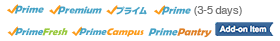

In [120]:
check_price()

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
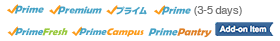

AttributeError: 'NoneType' object has no attribute 'get_text'

In [76]:
# To check the price every 5 seconds
while(True):
    check_price()
    time.sleep(5)

In [88]:
df = pd.read_csv(r"C:\Users\bindu\AmazonScrapedDataset.csv")
df

Title  Price        Date
0  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22
1  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22
2  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22
3  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22
4  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22
5  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22
6  Funny Got Data MIS Data Systems Business Analy...  18.99  2024-05-22